# ‘Portugal Bank Marketing’ dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

In [2]:
os.chdir(r"C:\Users\Sarkar\Desktop\164423063542460ec2379f8793842aa5b168a_")

In [3]:
os.listdir()

['bank.csv',
 'Machine Learning using Python Question Paper 1.pdf',
 'MonthWiseMarketArrivals_Clean.csv']

In [4]:
df=pd.read_csv("bank.csv",sep=";")

In [5]:
pd.set_option("display.max_columns",500)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

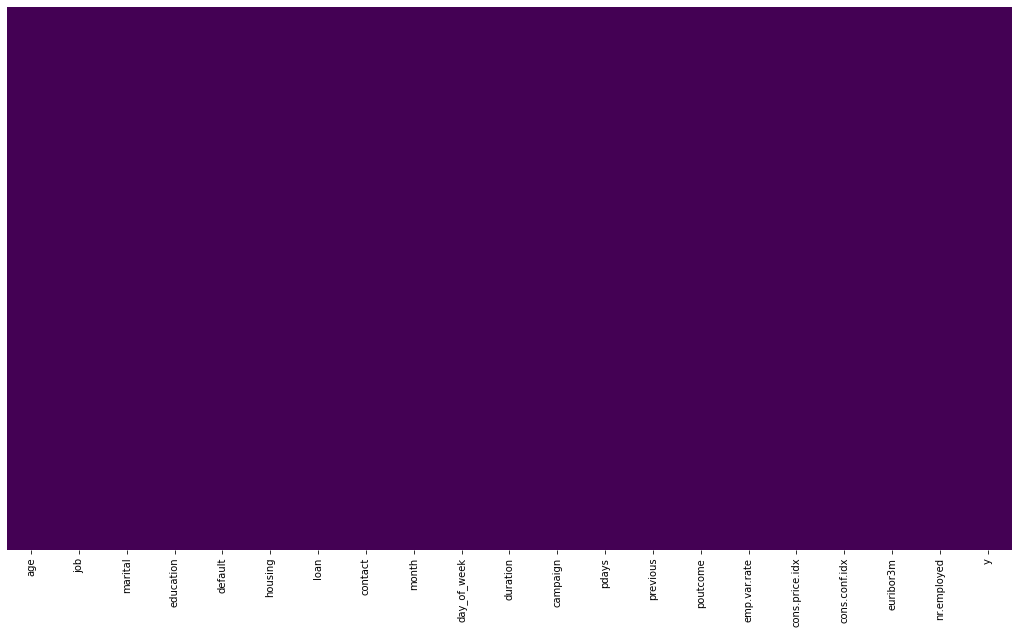

In [9]:
plt.figure(figsize=(18,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

***
* No missing values thus no need for missing value treatment
***

In [10]:
def univariate_cat(data,x):
    zero_value=data[x][data[x]==0].count()
    missing_value=data[x].isnull().sum()
    cat=data[x].nunique()
    list_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"counts"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)
    
    print("Total zero values:",zero_value)
    print("\nTotal missing values:",missing_value)
    print("\nTotal unique categories:",cat)
    print("\nUnique categories:",list_cat)
    print("\nPercentage distribution of individual category:\n",ff)
    sns.countplot(data=data, x=x)
    plt.show()

def univariate_num(data,x):
    missing=round(data[x].isnull().sum(),2)
    zero_value=round(data[x][data[x]==0].count(),2)
    mean_x=round(data[x].mean(),2)
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    range1=round(max1-min1, 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    skew_x=round(data[x].skew(),2)
    kurt_x=round(data[x].kurt(),2)
    Q1=data[x].quantile(.25)
    Q2=data[x].quantile(.50)
    Q3=data[x].quantile(.75)
    
    myvalue={"missing":missing,"zeros":zero_value, "min":min1, "max":max1, "mean":mean_x,
             "var":var,"std":std, "range":range1,"Q1":Q1, "Q2":Q2,"Q3":Q3,
            "skewness":skew_x, "kurtosis":kurt_x}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

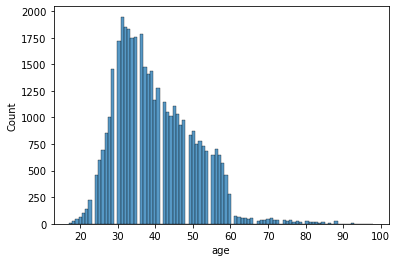

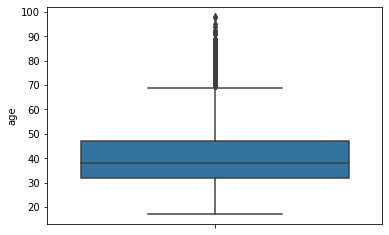

{'missing': 0,
 'zeros': 0,
 'min': 17,
 'max': 98,
 'mean': 40.02,
 'var': 108.6,
 'std': 10.42,
 'range': 81,
 'Q1': 32.0,
 'Q2': 38.0,
 'Q3': 47.0,
 'skewness': 0.78,
 'kurtosis': 0.79}

In [12]:
univariate_num(df,'age')

Total zero values: 0

Total missing values: 0

Total unique categories: 12

Unique categories: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']

Percentage distribution of individual category:
                counts Percentage
admin.          10422      25.3%
blue-collar      9254     22.47%
technician       6743     16.37%
services         3969      9.64%
management       2924       7.1%
retired          1720      4.18%
entrepreneur     1456      3.54%
self-employed    1421      3.45%
housemaid        1060      2.57%
unemployed       1014      2.46%
student           875      2.12%
unknown           330       0.8%


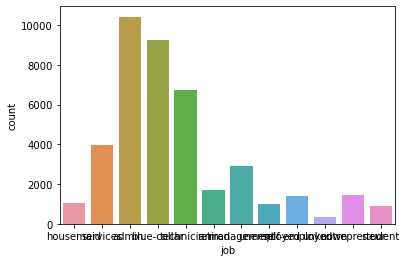

In [13]:
univariate_cat(df,'job')

In [14]:
df["job"]=df["job"].replace(["management", "admin."], "White-collar")

df["job"]=df["job"].replace(["services", "housemaid"], "Pink-collar")

df["job"]=df["job"].replace(["retired", "student", "unemployed", 
                                   "unknown"], "Others")

df["job"]=df["job"].replace(["self-employed", "entrepreneur"], 
                                  "self-depend")

Total zero values: 0

Total missing values: 0

Total unique categories: 6

Unique categories: ['Pink-collar', 'White-collar', 'blue-collar', 'technician', 'Others', 'self-depend']

Percentage distribution of individual category:
               counts Percentage
White-collar   13346      32.4%
blue-collar     9254     22.47%
technician      6743     16.37%
Pink-collar     5029     12.21%
Others          3939      9.56%
self-depend     2877      6.99%


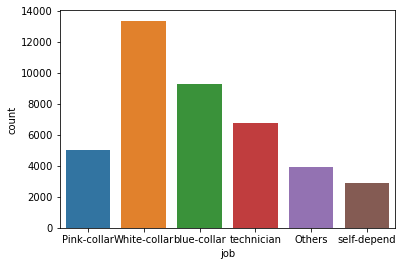

In [15]:
univariate_cat(df,'job')

Total zero values: 0

Total missing values: 0

Total unique categories: 4

Unique categories: ['married', 'single', 'divorced', 'unknown']

Percentage distribution of individual category:
           counts Percentage
married    24928     60.52%
single     11568     28.09%
divorced    4612      11.2%
unknown       80      0.19%


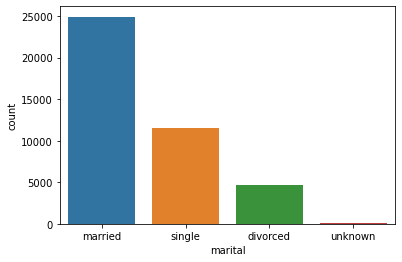

In [16]:
univariate_cat(df,'marital')

Total zero values: 0

Total missing values: 0

Total unique categories: 8

Unique categories: ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']

Percentage distribution of individual category:
                      counts Percentage
university.degree     12168     29.54%
high.school            9515      23.1%
basic.9y               6045     14.68%
professional.course    5243     12.73%
basic.4y               4176     10.14%
basic.6y               2292      5.56%
unknown                1731       4.2%
illiterate               18      0.04%


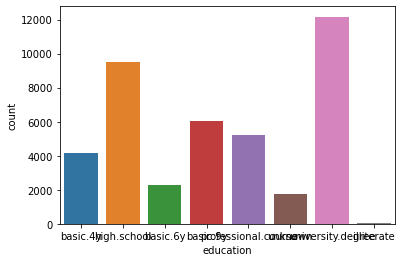

In [17]:
univariate_cat(df,'education')

Total zero values: 0

Total missing values: 0

Total unique categories: 3

Unique categories: ['no', 'unknown', 'yes']

Percentage distribution of individual category:
          counts Percentage
no        32588     79.12%
unknown    8597     20.87%
yes           3      0.01%


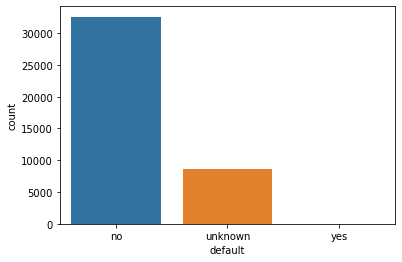

In [18]:
univariate_cat(df,'default')

Total zero values: 0

Total missing values: 0

Total unique categories: 3

Unique categories: ['no', 'yes', 'unknown']

Percentage distribution of individual category:
          counts Percentage
yes       21576     52.38%
no        18622     45.21%
unknown     990       2.4%


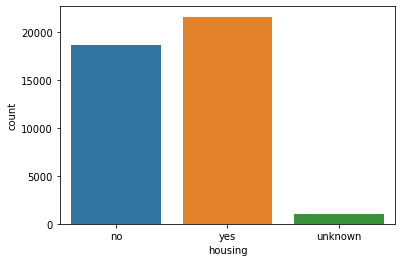

In [19]:
univariate_cat(df,'housing')

Total zero values: 0

Total missing values: 0

Total unique categories: 3

Unique categories: ['no', 'yes', 'unknown']

Percentage distribution of individual category:
          counts Percentage
no        33950     82.43%
yes        6248     15.17%
unknown     990       2.4%


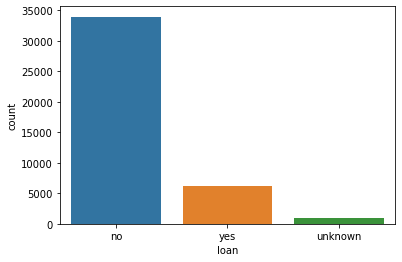

In [20]:
univariate_cat(df,'loan')

Total zero values: 0

Total missing values: 0

Total unique categories: 2

Unique categories: ['telephone', 'cellular']

Percentage distribution of individual category:
            counts Percentage
cellular    26144     63.47%
telephone   15044     36.53%


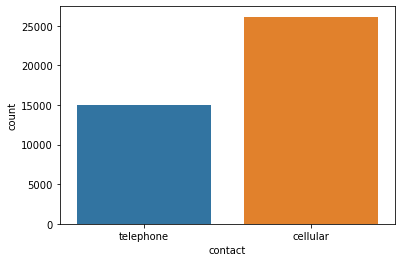

In [21]:
univariate_cat(df,'contact')

Total zero values: 0

Total missing values: 0

Total unique categories: 10

Unique categories: ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']

Percentage distribution of individual category:
      counts Percentage
may   13769     33.43%
jul    7174     17.42%
aug    6178      15.0%
jun    5318     12.91%
nov    4101      9.96%
apr    2632      6.39%
oct     718      1.74%
sep     570      1.38%
mar     546      1.33%
dec     182      0.44%


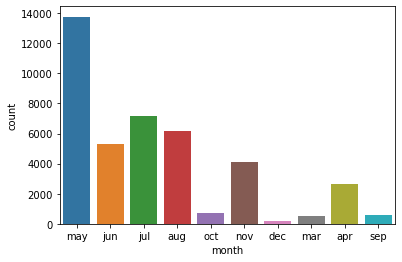

In [22]:
univariate_cat(df,'month')

Total zero values: 0

Total missing values: 0

Total unique categories: 5

Unique categories: ['mon', 'tue', 'wed', 'thu', 'fri']

Percentage distribution of individual category:
      counts Percentage
thu    8623     20.94%
mon    8514     20.67%
wed    8134     19.75%
tue    8090     19.64%
fri    7827      19.0%


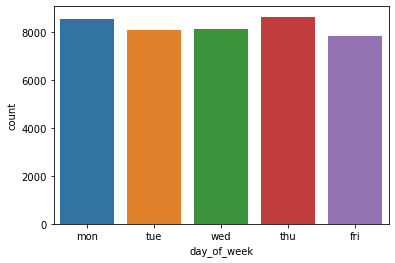

In [23]:
univariate_cat(df,'day_of_week')

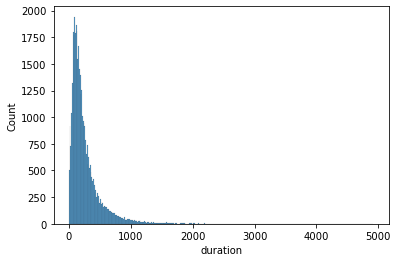

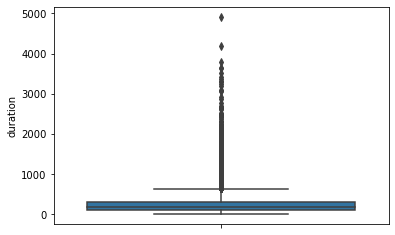

{'missing': 0,
 'zeros': 4,
 'min': 0,
 'max': 4918,
 'mean': 258.29,
 'var': 67225.73,
 'std': 259.28,
 'range': 4918,
 'Q1': 102.0,
 'Q2': 180.0,
 'Q3': 319.0,
 'skewness': 3.26,
 'kurtosis': 20.25}

In [24]:
univariate_num(df,'duration')

Total zero values: 0

Total missing values: 0

Total unique categories: 42

Unique categories: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]

Percentage distribution of individual category:
     counts Percentage
1    17642     42.83%
2    10570     25.66%
3     5341     12.97%
4     2651      6.44%
5     1599      3.88%
6      979      2.38%
7      629      1.53%
8      400      0.97%
9      283      0.69%
10     225      0.55%
11     177      0.43%
12     125       0.3%
13      92      0.22%
14      69      0.17%
17      58      0.14%
16      51      0.12%
15      51      0.12%
18      33      0.08%
20      30      0.07%
19      26      0.06%
21      24      0.06%
22      17      0.04%
23      16      0.04%
24      15      0.04%
27      11      0.03%
29      10      0.02%
28       8      0.02%
26       8      0.02%
25       8      0.02%
31       7      0.02%
30       7   

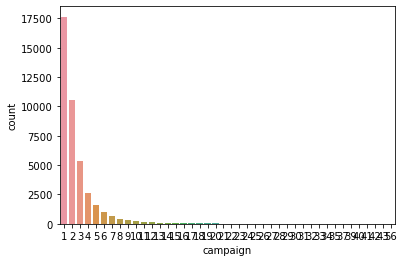

In [25]:
univariate_cat(df,'campaign')

Total zero values: 15

Total missing values: 0

Total unique categories: 27

Unique categories: [999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12, 13, 14, 15, 16, 21, 17, 18, 22, 25, 26, 19, 27, 20]

Percentage distribution of individual category:
      counts Percentage
999   39673     96.32%
3       439      1.07%
6       412       1.0%
4       118      0.29%
9        64      0.16%
2        61      0.15%
7        60      0.15%
12       58      0.14%
10       52      0.13%
5        46      0.11%
13       36      0.09%
11       28      0.07%
1        26      0.06%
15       24      0.06%
14       20      0.05%
8        18      0.04%
0        15      0.04%
16       11      0.03%
17        8      0.02%
18        7      0.02%
22        3      0.01%
19        3      0.01%
21        2       0.0%
25        1       0.0%
26        1       0.0%
27        1       0.0%
20        1       0.0%


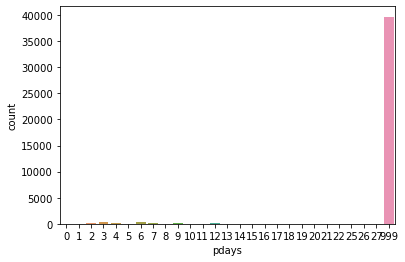

In [26]:
univariate_cat(df,'pdays')

Total zero values: 35563

Total missing values: 0

Total unique categories: 8

Unique categories: [0, 1, 2, 3, 4, 5, 6, 7]

Percentage distribution of individual category:
    counts Percentage
0   35563     86.34%
1    4561     11.07%
2     754      1.83%
3     216      0.52%
4      70      0.17%
5      18      0.04%
6       5      0.01%
7       1       0.0%


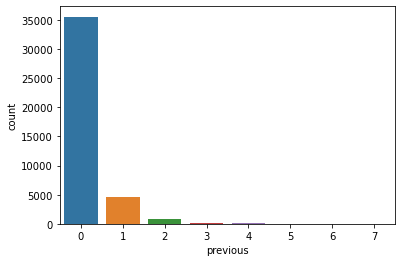

In [27]:
univariate_cat(df,'previous')

Total zero values: 0

Total missing values: 0

Total unique categories: 3

Unique categories: ['nonexistent', 'failure', 'success']

Percentage distribution of individual category:
              counts Percentage
nonexistent   35563     86.34%
failure        4252     10.32%
success        1373      3.33%


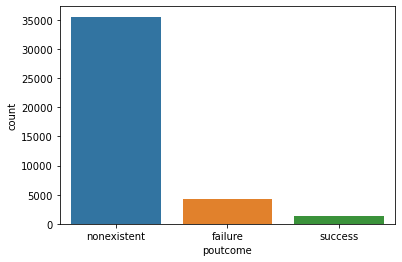

In [28]:
univariate_cat(df,'poutcome')

Total zero values: 0

Total missing values: 0

Total unique categories: 10

Unique categories: [1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0, -1.7, -1.1]

Percentage distribution of individual category:
       counts Percentage
 1.4   16234     39.41%
-1.8    9184      22.3%
 1.1    7763     18.85%
-0.1    3683      8.94%
-2.9    1663      4.04%
-3.4    1071       2.6%
-1.7     773      1.88%
-1.1     635      1.54%
-3.0     172      0.42%
-0.2      10      0.02%


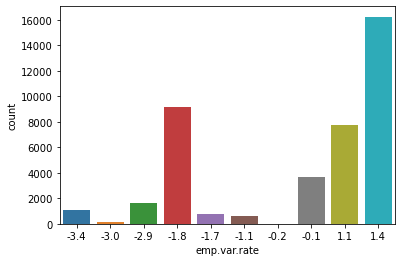

In [29]:
univariate_cat(df,'emp.var.rate')

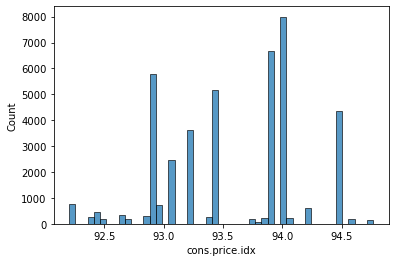

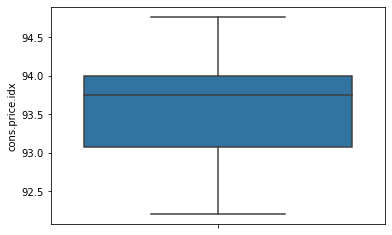

{'missing': 0,
 'zeros': 0,
 'min': 92.2,
 'max': 94.77,
 'mean': 93.58,
 'var': 0.34,
 'std': 0.58,
 'range': 2.57,
 'Q1': 93.075,
 'Q2': 93.749,
 'Q3': 93.994,
 'skewness': -0.23,
 'kurtosis': -0.83}

In [30]:
univariate_num(df,'cons.price.idx')

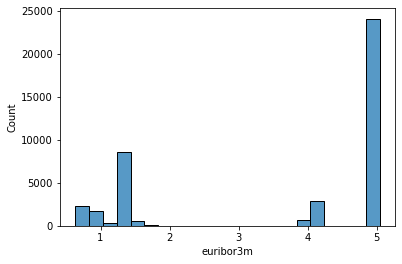

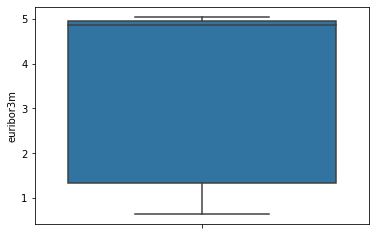

{'missing': 0,
 'zeros': 0,
 'min': 0.63,
 'max': 5.04,
 'mean': 3.62,
 'var': 3.01,
 'std': 1.73,
 'range': 4.41,
 'Q1': 1.344,
 'Q2': 4.857,
 'Q3': 4.961,
 'skewness': -0.71,
 'kurtosis': -1.41}

In [31]:
univariate_num(df,'euribor3m')

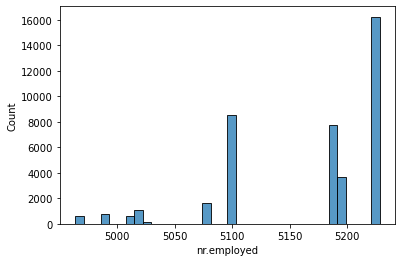

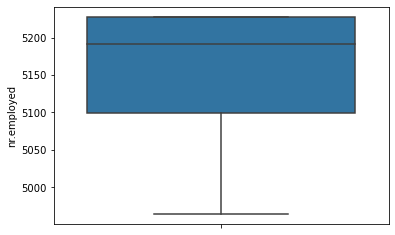

{'missing': 0,
 'zeros': 0,
 'min': 4963.6,
 'max': 5228.1,
 'mean': 5167.04,
 'var': 5220.28,
 'std': 72.25,
 'range': 264.5,
 'Q1': 5099.1,
 'Q2': 5191.0,
 'Q3': 5228.1,
 'skewness': -1.04,
 'kurtosis': -0.0}

In [32]:
univariate_num(df,'nr.employed')

Total zero values: 0

Total missing values: 0

Total unique categories: 2

Unique categories: ['no', 'yes']

Percentage distribution of individual category:
      counts Percentage
no    36548     88.73%
yes    4640     11.27%


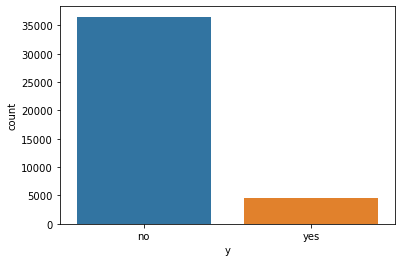

In [33]:
univariate_cat(df,'y')

In [34]:
df["y"]=df["y"].map({"yes":1, "no":0})

In [35]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

***
* Imbalance class problem
***

<AxesSubplot:>

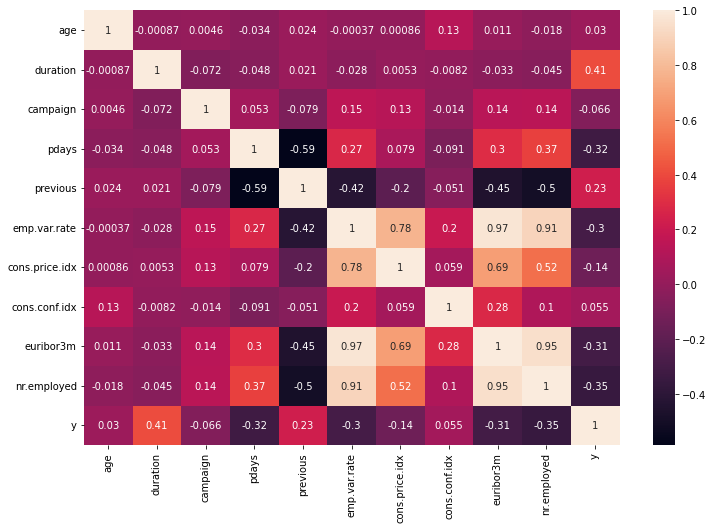

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Label Encoding

In [37]:
from sklearn import preprocessing

In [38]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [39]:
label_encoder = preprocessing.LabelEncoder()
for i in cat_col:
    df[i]= label_encoder.fit_transform(df[i])

In [41]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

# Random Forest

In [42]:
x=df.drop(columns=["y"])
y=df["y"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [44]:
st=StandardScaler()
x_train_st=pd.DataFrame(st.fit_transform(x_train),columns=x_train.columns)
x_test_st=pd.DataFrame(st.transform(x_test),columns=x_train.columns)

In [45]:
rfc = RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_depth=40,
                             criterion='entropy',
                             random_state=0, 
                             n_jobs=-4, verbose =1)
rfc.fit(x_train_st, y_train)

[Parallel(n_jobs=-4)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-4)]: Done 500 out of 500 | elapsed:   16.9s finished


RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_split=4,
                       n_estimators=500, n_jobs=-4, random_state=0, verbose=1)

In [46]:
print("Train_score:",rfc.score(x_train_st,y_train))
print("Test_score:",rfc.score(x_test_st,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train_score: 0.9959071832402622
Test_score: 0.9181840252488468


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


In [47]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_features=20,
                             max_depth=40,
                             criterion='entropy',
                             random_state=0, 
                             n_jobs=-4, verbose =1))
sel.fit(x_train_st,y_train)

[Parallel(n_jobs=-4)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-4)]: Done 500 out of 500 | elapsed:   50.2s finished


SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=40, max_features=20,
                                                 min_samples_split=4,
                                                 n_estimators=500, n_jobs=-4,
                                                 random_state=0, verbose=1))

In [48]:
selected_feat= x_train_st.columns[(sel.get_support())]
len(selected_feat)

5

In [49]:
print(selected_feat)

Index(['age', 'duration', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')


In [50]:
df1=df[['age', 'duration', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']]

# Handling unbalanced data using SMOTE

In [51]:
X=df1.drop("y",axis=1)
y=df1["y"]

In [53]:
sm = SMOTE(random_state=2,k_neighbors=5)
X, y = sm.fit_resample(X, y.ravel())

<AxesSubplot:ylabel='count'>

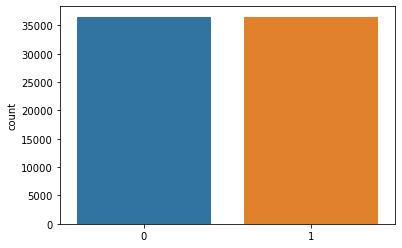

In [55]:
sns.countplot(x=y)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [59]:
st_x= StandardScaler()
x_train_st=pd.DataFrame(st.fit_transform(x_train),columns=x_train.columns)
x_test_st=pd.DataFrame(st.transform(x_test),columns=x_train.columns)

# Logistic Regression

In [60]:
LR=LogisticRegression(solver='lbfgs',max_iter=100)
LR.fit(x_train_st,y_train)

LogisticRegression()

In [62]:
print("Train Score: ",LR.score(x_train_st,y_train))
print("Test Score: ",LR.score(x_test_st,y_test))

Train Score:  0.8417970887599868
Test Score:  0.8392251285980081


<AxesSubplot:>

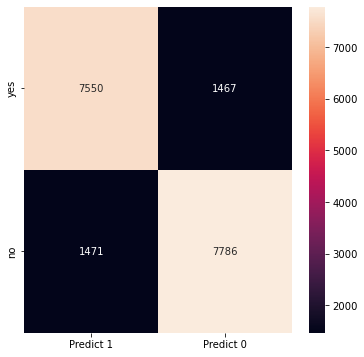

In [64]:
predic=LR.predict(x_test_st)
cm=metrics.confusion_matrix(y_test,predic)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm,annot=True,fmt='g')

In [65]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      9017
           1       0.84      0.84      0.84      9257

    accuracy                           0.84     18274
   macro avg       0.84      0.84      0.84     18274
weighted avg       0.84      0.84      0.84     18274



In [67]:
from sklearn.metrics import accuracy_score
fp_lr= cm[0][1]
accuracy_lr = accuracy_score(y_test,predic)

# Adaboost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train_st,y_train)

AdaBoostClassifier()

In [70]:
print("Train Score: ",ada.score(x_train_st,y_train))
print("Test Score: ",ada.score(x_test_st,y_test))

Train Score:  0.8901900696800554
Test Score:  0.8842617927109555


<AxesSubplot:>

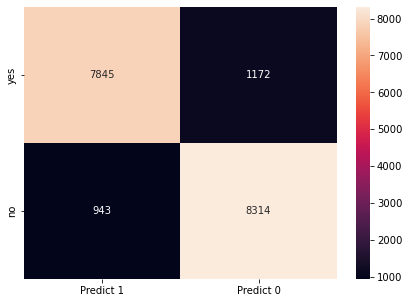

In [71]:
predic=ada.predict(x_test_st)
cm=metrics.confusion_matrix(y_test,predic)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [73]:
print(metrics.classification_report(y_test, predic))
fp_abc= cm[0][1]
accuracy_abc = accuracy_score(y_test,predic)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      9017
           1       0.88      0.90      0.89      9257

    accuracy                           0.88     18274
   macro avg       0.88      0.88      0.88     18274
weighted avg       0.88      0.88      0.88     18274



# Naïve Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_st,y_train)
print("Train Score: ",nb.score(x_train_st,y_train))
print("Test Score: ",nb.score(x_test_st,y_test))

Train Score:  0.794224946189486
Test Score:  0.7929298456823903


<AxesSubplot:>

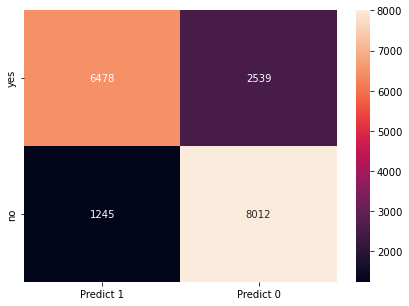

In [76]:
predic=nb.predict(x_test_st)
cm=metrics.confusion_matrix(y_test,predic)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [78]:
print(metrics.classification_report(y_test, predic))
fp_nb= cm[0][1]
accuracy_nb= accuracy_score(y_test,predic)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77      9017
           1       0.76      0.87      0.81      9257

    accuracy                           0.79     18274
   macro avg       0.80      0.79      0.79     18274
weighted avg       0.80      0.79      0.79     18274



# KNN

In [79]:
knn = KNeighborsClassifier(n_neighbors=15,leaf_size=25,
    p=2)
knn.fit(x_train_st, y_train)
 
print("Train Score: ",knn.score(x_train_st,y_train))
print("Test Score: ",knn.score(x_test_st,y_test))

Train Score:  0.906096092809456
Test Score:  0.8964102002845573


<AxesSubplot:>

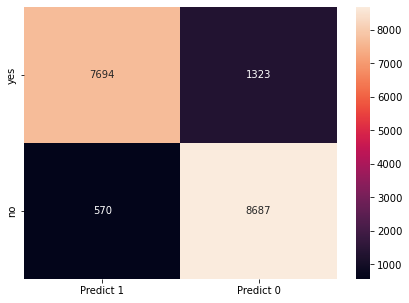

In [80]:
predic=knn.predict(x_test_st)
cm=metrics.confusion_matrix(y_test,predic)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [81]:
print(metrics.classification_report(y_test, predic))
fp_knn= cm[0][1]
accuracy_knn= accuracy_score(y_test,predic)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      9017
           1       0.87      0.94      0.90      9257

    accuracy                           0.90     18274
   macro avg       0.90      0.90      0.90     18274
weighted avg       0.90      0.90      0.90     18274



In [82]:
from sklearn.svm import SVC # "Support vector classifier"
svm = SVC(kernel = 'linear', C=3)
svm.fit(x_train_st,y_train)
print("Train Score: ",svm.score(x_train_st,y_train))
print("Test Score: ",svm.score(x_test_st,y_test))

Train Score:  0.8458283170989749
Test Score:  0.8420159789865382


<AxesSubplot:>

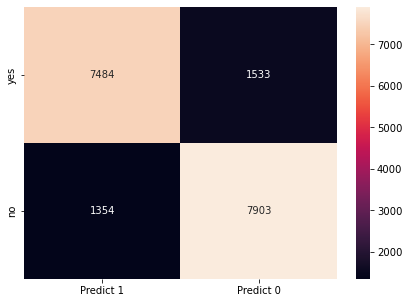

In [83]:
predic=svm.predict(x_test_st)
cm=metrics.confusion_matrix(y_test,predic)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [85]:
print(metrics.classification_report(y_test, predic))
fp_svm= cm[0][1]
accuracy_svm= accuracy_score(y_test,predic)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      9017
           1       0.84      0.85      0.85      9257

    accuracy                           0.84     18274
   macro avg       0.84      0.84      0.84     18274
weighted avg       0.84      0.84      0.84     18274



# Tabulation of the performance metrics

In [87]:
performance_metrics=[['Logistic Regression',fp_lr,accuracy_lr],
   ['AdaBoost',fp_abc,accuracy_abc],
   ['Naive bayes',fp_nb,accuracy_nb],
   ['KNN',fp_knn,accuracy_knn],
   ['SVM',fp_svm,accuracy_svm]]
performance_metrics = pd.DataFrame(inf, columns = ['Model','FP','Accuracy'])
performance_metrics

,Model,FP,Accuracy
0,Logistic Regression,1467,0.839225
1,AdaBoost,1172,0.884262
2,Naive bayes,2539,0.792930
3,KNN,1323,0.896410
4,SVM,1533,0.842016


***
* **Observation**: KNN and AdaBoost classifier has the highest accuracy and low False Positive count than other models.
*** 